# Linear Regression

### Linear Regression for Solving Regression Problems

Linear regression is a commonly used technique for solving regression problems. In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).


Here's a visual summary of how a linear regression model is structured:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">


For a mathematical discussion of linear regression, watch [this YouTube playlist](https://www.youtube.com/watch?v=kHwlB_j7Hkc&list=PLJs7lEb1U5pYnrI0Wn4mzPmppVqwERL_4&index=1)

### Regression Problems

Problems where a continuous numeric value must be predicted for each input are known as _regression problems_.

Here are some example of regression problems:

- [Medical Charges Prediction](https://www.kaggle.com/subhakarks/medical-insurance-cost-analysis-and-prediction)
- [House Price Prediction](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) 
- [Ocean Temperature Prediction](https://www.kaggle.com/sohier/calcofi)
- [Weather Temperature Prediction](https://www.kaggle.com/budincsevity/szeged-weather)

Can you think of some more regression problems?

> **EXERCISE**: Replicate the steps followed in the [previous tutorial](https://jovian.ai/aakashns/python-sklearn-linear-regression) with each of the above datasets.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Let's save our work before continuing.

In [6]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [8]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [9]:
fig = px.histogram(df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the [number of people of any given age](https://www.statista.com/statistics/241488/population-of-the-us-by-sex-and-age/) (between 18 & 64) in the USA.



> **EXERCISE**: Can you explain why there are over twice as many customers with ages 18 and 19, compared to other ages?
>
> ???


### Body Mass Index

Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [10]:
fig = px.histogram(df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

### Charges

Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [11]:
fig = px.histogram(df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['red', 'yellow'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:

* For most customers, the annual medical charges are under \\$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
* There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is \\$7300, the median for smokers is close to \\$35,000.


> **EXERCISE**: Visualize the distribution of medical charges in connection with other factors like "sex" and "region". What do you observe?

In [12]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [13]:
px.histogram(df, 
             x='smoker', 
             color='sex', 
             title='Smoker')

In [14]:
fig = px.histogram(df, 
                   x='region', 
                   color='sex', 
                   color_discrete_sequence=['red', 'yellow'], 
                   title='Annual Medical Charges based on region and sex')
fig.update_layout(bargap=0.1)
fig.show()

It appears that 20% of customers have reported that they smoke. Can you verify whether this matches the national average, assuming the data was collected in 2010? We can also see that smoking appears a more common habit among males. Can you verify this?



> **EXERCISE**: Visualize the distributions of the "sex", "region" and "children" columns and report your observations. 

Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

### Age and Charges

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [15]:
fig = px.scatter(df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.
     

> **EXERCISE**: What other inferences can you draw from the above chart?
>
> ???

### BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [16]:
fig = px.scatter(df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex','age'], 
                 title='BMI V/S Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

What other insights can you gather from the above graph?

> **EXERCISE**: Create some more graphs to visualize how the "charges" column is related to other columns ("children", "sex", "region" and "smoker"). Summarize the insights gathered from these graphs.
>
> *Hint*: Use violin plots (`px.violin`) and bar plots (`sns.barplot`)


In [17]:
px.violin(df, 
          x='children', 
          y='charges')

## Correlation

In [18]:
df.charges.corr(df.age)

np.float64(0.2990081933306478)

In [19]:
df.charges.corr(df.children)

np.float64(0.06799822684790487)

In [20]:
df.charges.corr(df.bmi)

np.float64(0.19834096883362887)

### Manual Label Encoding

In [21]:
smoker_values = {'no':0, 'yes':1}
smoker_numeric = df.smoker.map(smoker_values)

In [22]:
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [23]:
df.charges.corr(smoker_numeric)

np.float64(0.7872514304984778)

In [24]:
# we can also use corr with whole DATASET

dp = df.drop(columns=['smoker','region','sex'])
dp['smokerBinary'] = smoker_numeric
dp.corr()

,age,bmi,children,charges,smokerBinary
age,1.000000,0.109272,0.042469,0.299008,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.787251
smokerBinary,-0.025019,0.003750,0.007673,0.787251,1.000000


<Axes: >

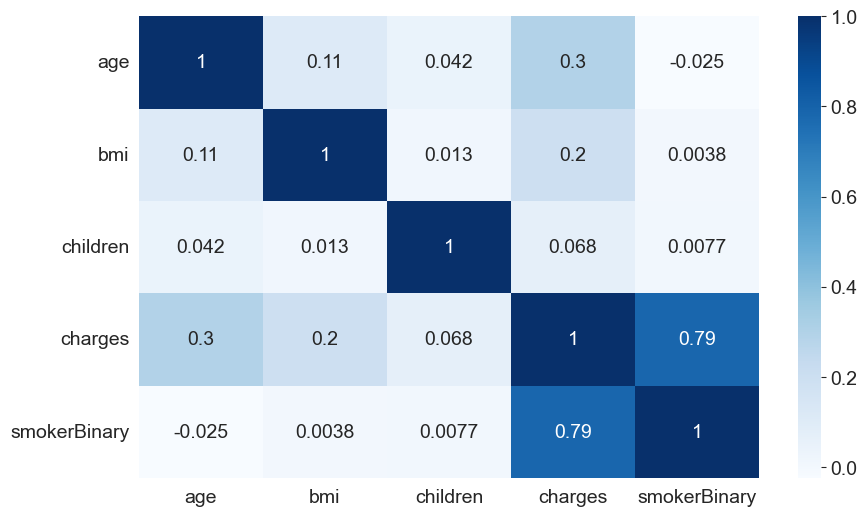

In [25]:
sns.heatmap(dp.corr(), cmap='Blues', annot=True)

## Linear Regression (Using single feature)

In [26]:
nonSmoker_df = df[df.smoker == 'no']
nonSmoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: title={'center': 'Age vs Charges for Non Smokers'}, xlabel='age', ylabel='charges'>

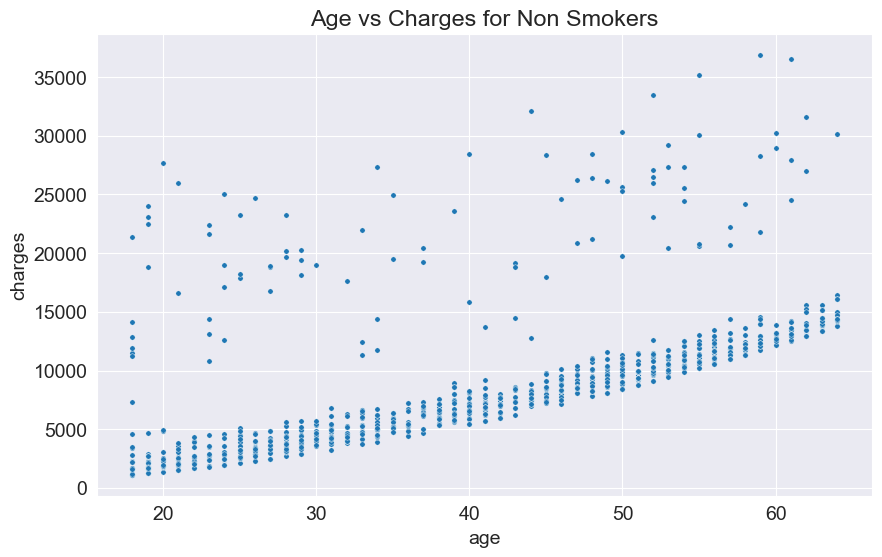

In [27]:
plt.title('Age vs Charges for Non Smokers')

sns.scatterplot(data = nonSmoker_df, 
                x='age', 
                y='charges', 
                alpha=1, 
                s=15)

In [ ]:
def estimateCharges(age,w,b):
    return age*w + b;


# assuming  that out Linear regression forms a line with gernalised formula y = wx + b where w is the slope (or weight) of the line and b is the constant intercept when the value of x is 0 

In [29]:
estimateCharges(30,50,100)

1600

In [ ]:
# Assuming values of w and b
w = 50;
b = 100;

In [31]:
ages = nonSmoker_df.age
estimatedCharges = estimateCharges(ages, w, b)
estimatedCharges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [32]:
nonSmoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

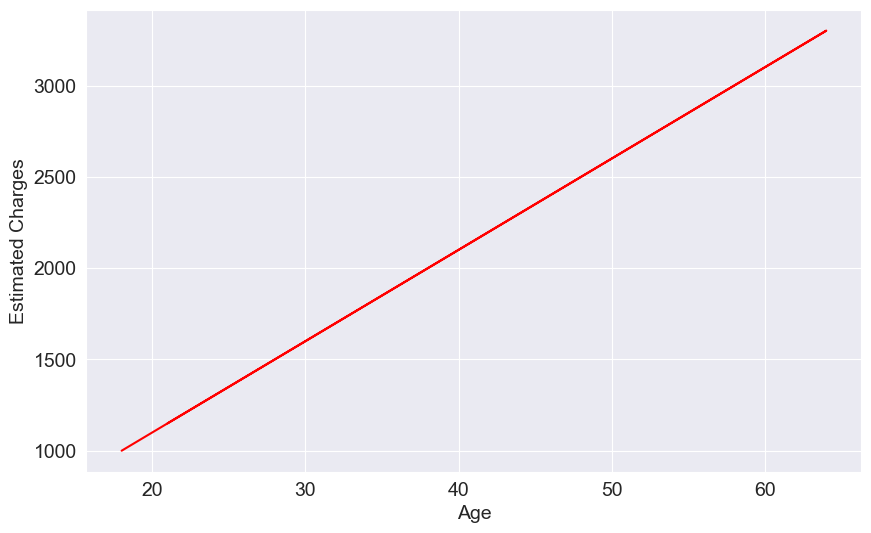

In [33]:
plt.plot(ages, estimatedCharges, 'r-');
plt.xlabel('Age')
plt.ylabel('Estimated Charges');

### Lets try plotting this line over the actual data to see if it actually fits

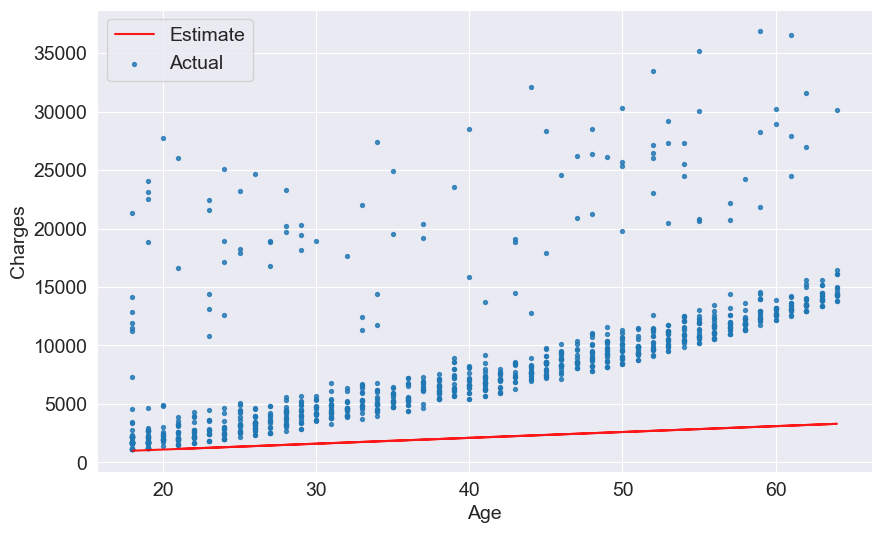

In [34]:
target = nonSmoker_df.charges
plt.plot(ages, estimatedCharges, 'r', alpha=0.9);

plt.scatter(ages, target, s=8, alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges');
plt.legend(['Estimate','Actual']);

# Not Even Close
### lets try changing parameters a littlebit, and lets make a function for the same

In [35]:
def tryParams(w,b):
    ages = nonSmoker_df.age
    target = nonSmoker_df.charges

    estimatedCharges = estimateCharges(ages, w, b)

    plt.plot(ages, estimatedCharges, 'r', alpha=0.9);

    plt.scatter(ages, target, s=8, alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges');
    plt.legend(['Estimate','Actual']);

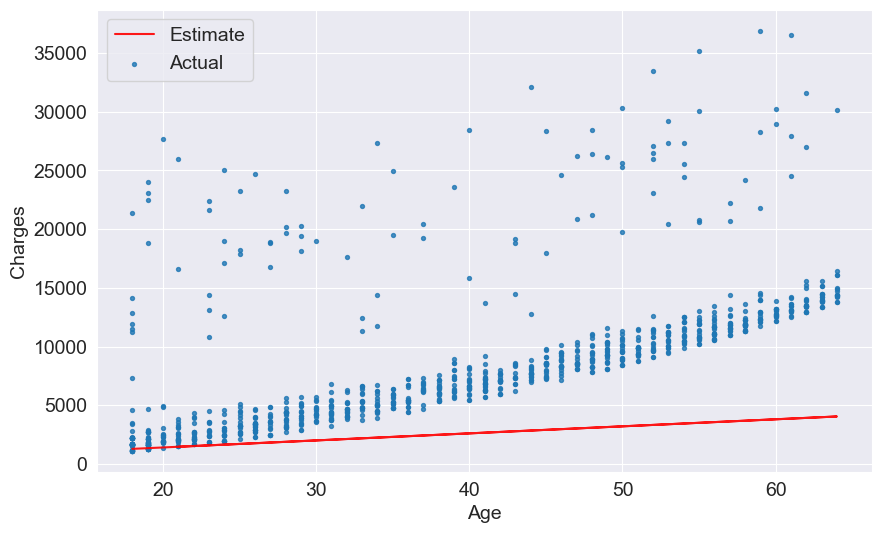

In [36]:
tryParams(60, 200)

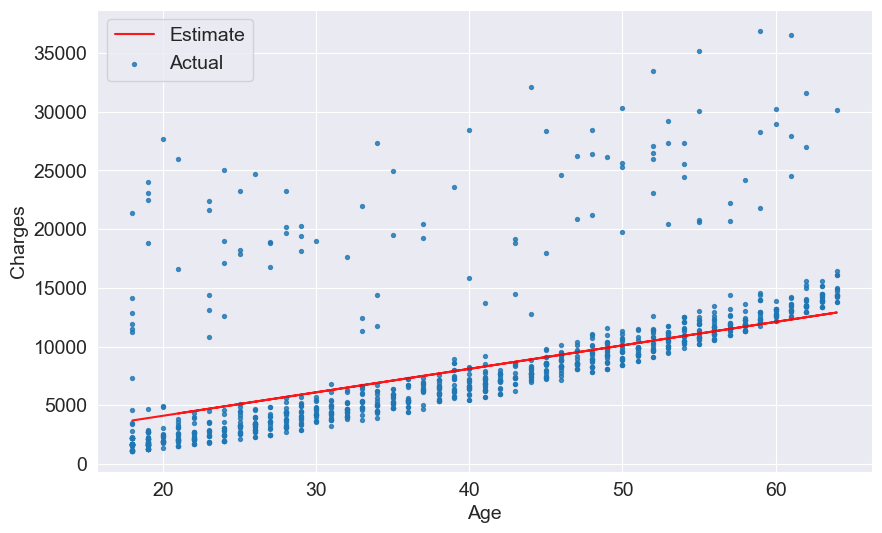

In [ ]:
tryParams(200, 100)

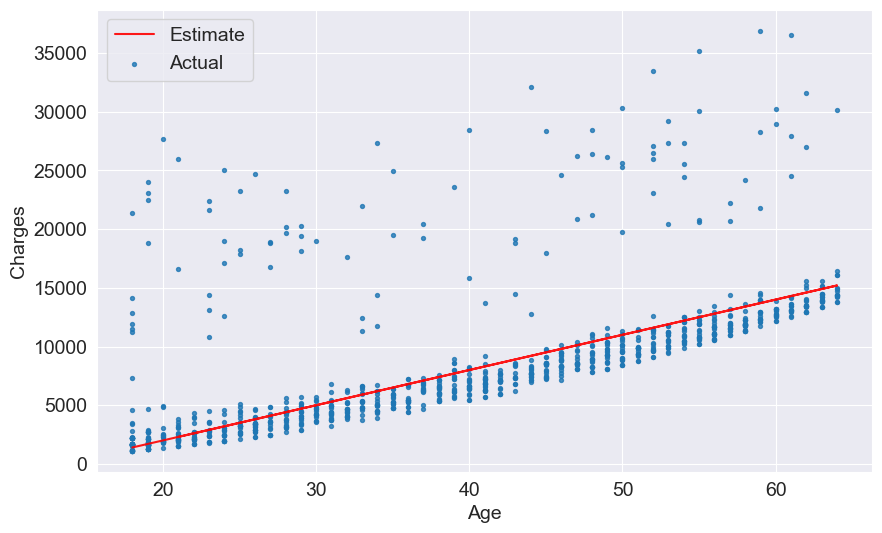

In [38]:
tryParams(300, -4000)

#### Now insted of manually checking different values, wouldnt it be better  if a  computer could chech various values and gives us the best result?

In [39]:
# finding the root mean square error

import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [40]:
w = 50
b = 100

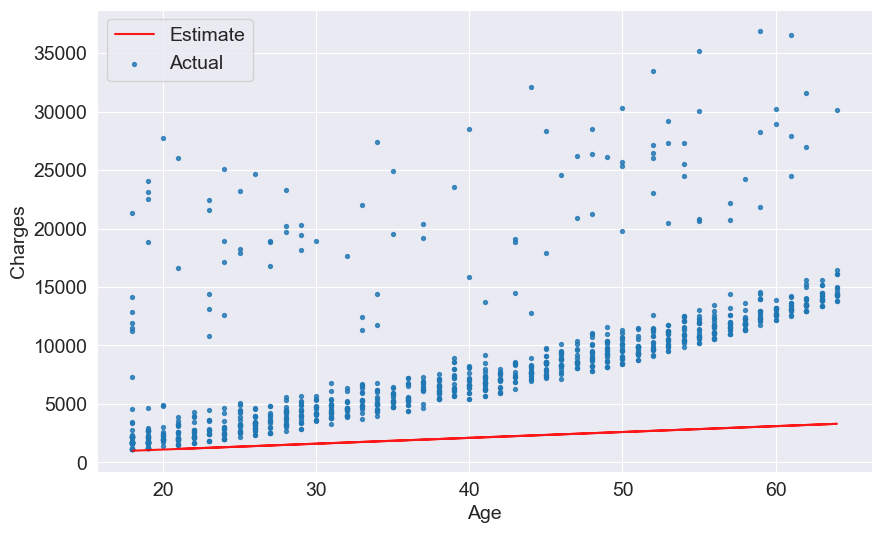

In [41]:
tryParams(w,b)

In [42]:
targets = nonSmoker_df['charges']
predicted = estimateCharges(nonSmoker_df.age, w, b)

In [43]:
rmse(targets, predicted)

np.float64(8461.949562575493)

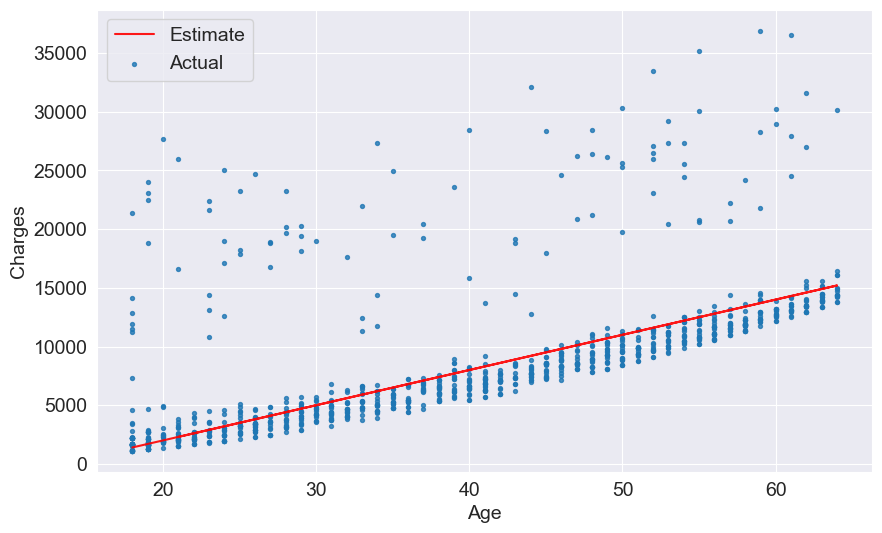

In [44]:
# Lets try and reduce the loss
w = 300
b = -4000

tryParams(w,b)

In [46]:
targets = nonSmoker_df['charges']
predicted = estimateCharges(nonSmoker_df.age, w, b)
rmse(targets, predicted)

np.float64(4725.9133994520325)

In [ ]:
# this was the best i could do manually

# we use ordinary least Squares to fnd optimal values for smaller datasets(few thousands) and Stochastic gradient decent for larger datasets(tens of thousands of rows)

In [47]:
# we cannot actually implement these, hence we have to rely on libraries to implement these
# Most common ans mos used beautiful library is the scikit learn library, also kown as SK Learn.

## Linear regresson using scikit learn

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression()

In [50]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
inputs = nonSmoker_df[['age']]
#instead of using df.charges or df.age we are taking them inside [[]] because the fit method expects a dataframe and not a series, lets checl shape and type of data
targets = nonSmoker_df.charges

print('input.shape: ',inputs.shape)
print('targets.shape: ',targets.shape)



input.shape:  (1064, 1)
targets.shape:  (1064,)


In [52]:
model.fit(inputs,targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
model.predict(np.array([[23],
                        [37],
                        [19]]))

c:\Users\Prabhjot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([4055.30443855, 7796.78921819, 2986.30878723])

In [54]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [55]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [56]:
rmse(targets, predictions)

np.float64(4662.505766636395)

Seems like we are getting predictions which are off by approximately 4500 on average, which is not bad considering the fact that there are several outliers.

Now lets check the model coefficient and model intercept

In [57]:
model.coef_

array([267.24891283])

In [58]:
model.intercept_

np.float64(-2091.4205565650864)

Lets check if our try_parameter function justifies these values graphically aswell.

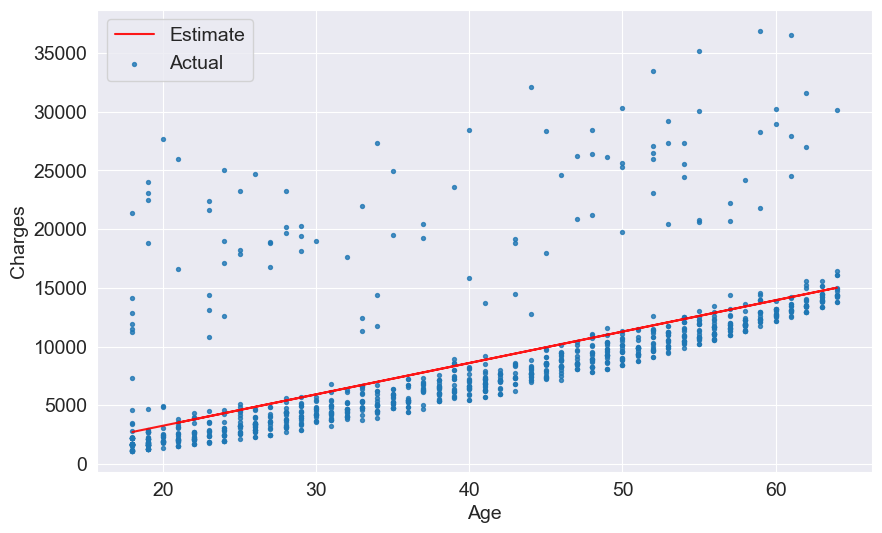

In [59]:
tryParams(model.coef_, model.intercept_)

## Lets try SGDRegressor for the same problem

In [60]:
from sklearn.linear_model import SGDRegressor

In [ ]:
model = SGDRegressor()

In [62]:
help(model.fit)

Help on function fit in module sklearn.linear_model._stochastic_gradient:

fit(self, X, y, coef_init=None, intercept_init=None, sample_weight=None)
    Fit linear model with Stochastic Gradient Descent.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training data.
    
    y : ndarray of shape (n_samples,)
        Target values.
    
    coef_init : ndarray of shape (n_features,), default=None
        The initial coefficients to warm-start the optimization.
    
    intercept_init : ndarray of shape (1,), default=None
        The initial intercept to warm-start the optimization.
    
    sample_weight : array-like, shape (n_samples,), default=None
        Weights applied to individual samples (1. for unweighted).
    
    Returns
    -------
    self : object
        Fitted `SGDRegressor` estimator.



Repeat the steps and train linear model and SGD for medical charges for smokers. Visualise target and predictions, and compute loss.

### Machine Learning

We have just trained our first ML model !!

Machine Learning is nothing but the process of computing the best parameters to model the relationship between some features and targets.


Every ML model has :-

1. Model
2. Cost Function
3. Optimizer

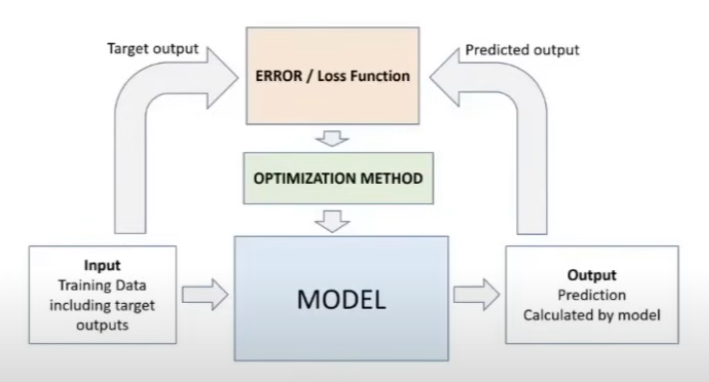

As we,ve seen above, it just takes a few steps and lines of code to train a machine learning model using Scikit-Learn.

### Machine Learning Workflow

Whether we're solving a regression problem using linear regression or a classification problem using logistic regression, the workflow for training a model is exactly the same:

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">


Classification and regression are both supervised machine learning problems, because they use labeled data. Machine learning applied to unlabeled data is known as unsupervised learning ([image source](https://au.mathworks.com/help/stats/machine-learning-in-matlab.html)). 

<img src="https://i.imgur.com/1EMQmAw.png" width="480">


In this tutorial, we'll train a _logistic regression_ model using the Rain in Australia dataset to predict whether or not it will rain at a location tomorrow, using today's data. This is a _binary classification_ problem.

Let's install the `scikit-learn` library which we'll use to train our model.

In [63]:
# Create input and targets
inputs, targets = nonSmoker_df[['age']], nonSmoker_df['charges']

# Create and train model
model = LinearRegression().fit(inputs,targets)

# Generate Predictions
predictions = model.predict(inputs)

# Compute loss to evaluate model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4662.505766636395


### Linear Regression using Multiple Features

So far we have used just 'age' feature to estimate the 'charges'. Lets try adding more features like 'BMI', its fairly straight forward. We simply assume the relation ship to be:-

charges = m1 x age + m2 x bmi + c

We just need to change one line of code to include BMI

In [64]:
# Create input and targets
inputs, targets = nonSmoker_df[['age','bmi']], nonSmoker_df['charges']

# Create and train model
model = LinearRegression().fit(inputs,targets)

# Generate Predictions
predictions = model.predict(inputs)

# Compute loss to evaluate model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4662.3128354612945


Adding BMI doesnt seem to reduce the loss by much, as BMI is a very weak corellation with charges, especially for non smokers.

In [65]:
nonSmoker_df.charges.corr(nonSmoker_df.bmi) 

np.float64(0.08403654312833271)

There is little to no relationship between the non smoker bmi and charges, we cannot establish a relationship between them no matter what ML algorithm we use.

Try training a Linear Regression model to estimate charges based on BMI alone and check if it gives better or worse results than that with age.

In [66]:
# lets try adding children to this aswell
nonSmoker_df.charges.corr(nonSmoker_df.children) 

np.float64(0.13892870453542205)

In [67]:
# there is some relation between charges and children, lets try and visualise it

fig = px.strip(nonSmoker_df, x='children', y='charges', title="Children vs Charges")
fig.update_traces(marker_size=4, marker_opacity=0.8)
fig.show()

In [68]:
# Create input and targets
inputs, targets = nonSmoker_df[['age','bmi','children']], nonSmoker_df['charges']

# Create and train model
model = LinearRegression().fit(inputs,targets)

# Generate Predictions
predictions = model.predict(inputs)

# Compute loss to evaluate model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4608.470405038246


Even though there is a greater reduction in the loss as compared to the BMI, but we dont see a big reduction in loss.

Try repeating these steps and train a LR model to estimate charges for smokers.

Lets just use the entire dataset insted of just non smokers

In [69]:
# Create input and targets
inputs, targets = df[['age','bmi','children']], df['charges']

# Create and train model
model = LinearRegression().fit(inputs,targets)

# Generate Predictions
predictions = model.predict(inputs)

# Compute loss to evaluate model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  11355.317901125973


As we can see, the loss is much high as the charges for smokres and non smokers are quiet far away.

Lets try using categorical data aswell

In [70]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To use categorical columns, we simply need to convert them to numbers.

There are 3 types of encoding:-
1. If a category has just twocategories(it's called a binary category), then we can replace their vaues with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform One-hot Encoding i.e. create a new column for each category with 0s and 1s.
3. If the categories have a natura order(eg, cold, neutral, warm, hot), then they can be converted to numbers(eg. 1, 2, 3, 4) preserving the order. These are called Ordinals.

## Binary Categories

The 'smoker' category has just 2 value 'yes'/'no'. Hence we can create a new column as smokerBi.

In [71]:
# Mapping yes/no values to 0-1

smoker_values = {'no':0, 'yes':1}
smokerBi = df.smoker.map(smoker_values)

In [72]:
df['smokerBi'] = smokerBi
df.head(5)

,age,sex,bmi,children,smoker,region,charges,smokerBi
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [73]:
df.charges.corr(df.smokerBi)

np.float64(0.7872514304984778)

As we can see the smoker data is very much related to the charges. Hence we can say that the categorical data cannot be ignored when training a ML model.

In [74]:
# Create input and targets
inputs, targets = df[['age','bmi','children','smokerBi']], df['charges']

# Create and train model
model = LinearRegression().fit(inputs,targets)

# Generate Predictions
predictions = model.predict(inputs)

# Compute loss to evaluate model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6056.439217188081


Similarly we can encode sex and region as well

In [75]:
# Mapping male/female values to 0-1

sex_values = {'female':0, 'male':1}
sexBi = df.sex.map(sex_values)

In [76]:
df['sexBi'] = sexBi
df.head(5)

,age,sex,bmi,children,smoker,region,charges,smokerBi,sexBi
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [77]:
# Create input and targets
inputs, targets = df[['age','bmi','children','smokerBi','sexBi']], df['charges']

# Create and train model
model = LinearRegression().fit(inputs,targets)

# Generate Predictions
predictions = model.predict(inputs)

# Compute loss to evaluate model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6056.100708754546


In [78]:
df.sexBi.corr(df.charges)

np.float64(0.05729206220202534)

We did not see much change in loss after adding the sex column as the correlation between sex and charges is very weak.

Lets try encoding for region, as region has more than 2 values and are not continuous values, we have to encode them using one-hot encoding.

Now, insted of having NE NW SE SW in the same column, we will have 4 different rows for each and having 0/1 values for each

Lets see if region even affects the charges

<Axes: xlabel='region', ylabel='charges'>

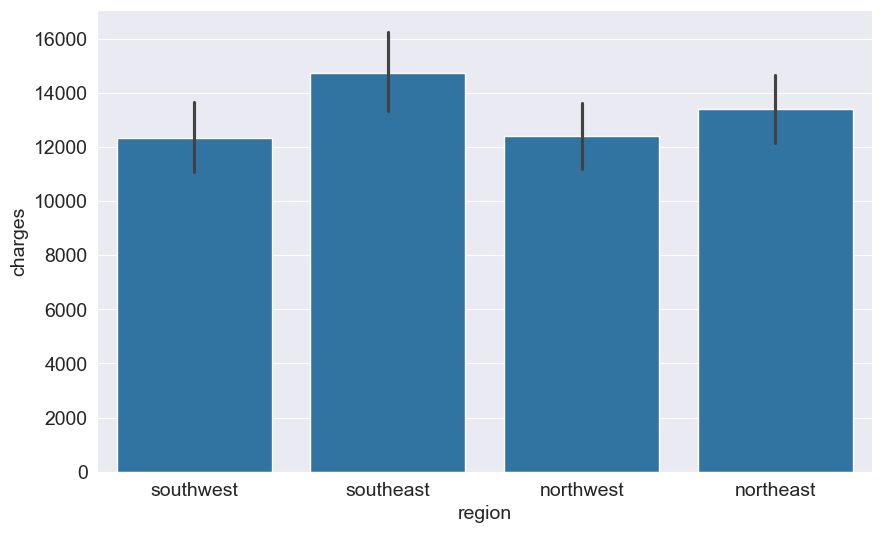

In [79]:
sns.barplot(data=df, x='region', y='charges')

as we can see, there is different charges for different regions, so maybe there is some relationship between region an charges.


In [80]:
# importing and encoding using onehot en coder automatically

from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [81]:
# lets see if the encoder is working and is able to transform

enc.transform([['northeast']]).toarray()

c:\Users\Prabhjot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.]])

In [82]:
# encoding all the region column and creating 4 columns

onehot = enc.transform(df[['region']]).toarray()
onehot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [83]:
# lets name these 4 arrays and add them to our df

df[['northeast','northwest','southeast','southwest']] = onehot
df.head(5)

,age,sex,bmi,children,smoker,region,charges,smokerBi,sexBi,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [84]:
# lets see how our input array looks like

input_cols = ['age', 'bmi', 'children', 'smokerBi', 'sexBi', 'northeast', 'northwest', 'southeast', 'southwest']

df[input_cols].loc[40]

age          24.0
bmi          26.6
children      0.0
smokerBi      0.0
sexBi         0.0
northeast     1.0
northwest     0.0
southeast     0.0
southwest     0.0
Name: 40, dtype: float64

In [85]:
# Lets train the model including the 4 new encoded region columns

# Create input and targets
inputs, targets = df[['age','bmi','children', 'sexBi','smokerBi','northeast','northwest','southeast','southwest']], df['charges']

# Create and train model
model = LinearRegression().fit(inputs,targets)

# Generate Predictions
predictions = model.predict(inputs)

# Compute loss to evaluate model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6041.679651174452


Again, the difference isnt much, but theres a fairly small reduction

Try making two different models, one with just non smokers with all these values and one with just smokers. And then see if its woorth using just one model or we should rather use 2 different ones.

### Model improvements

Lets try and implement a few improvements to our model.

### Feature Scaling

Due to some regulatory requirement, we also need to explain the rationale behind the predictions of out model.

charges = w1 x age + w2 x bmi + w3 x smoker + w4 x sex + w5 x region



In [86]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515,  -131.3143594 ,
       23848.53454191,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [87]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smokerBi,-131.314359
4,sexBi,23848.534542
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


These are the weights w1 w2 .... for all te categories in out input array. Even tho this may look like age is having much more impact than BMI then why is it contributing just 256 weight? Which is a valid question. But te rance of our data for age is 47 (18 to 64) where as BMI ranges mostly between 25 values (15 to 40) Hence the weight that age adds is upto 256*47 = 12032. Which seems much more appropriate weight accourding to the correlation it has with charges.

While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![](https://i.imgur.com/dT5fLFI.png)

We can apply scaling using the StandardScaler class from `scikit-learn`.

### Implementing scaling of features using SKlearn

Why scaling?

1.Brings data to same scale.

-> Features in a dataset can vary in units and ranges: 
age - 18-64
charges - 1100 - 64000
bmi - 15 - 40

Without scaling, the model may tret high-range features more "important" just due to their magnitude.

2. Improves Algorithm Performance

Some models assume or are sensitive to the scale of the data:

| Algorithm                       | Scaling Required? | Why?                                   |
| ------------------------------- | ----------------- | -------------------------------------- |
| K-Nearest Neighbors (KNN)       | ✅ Yes             | Distance-based                         |
| Support Vector Machines (SVM)   | ✅ Yes             | Uses dot products, margin optimization |
| Logistic/Linear Regression      | ✅ Yes             | Gradient descent converges faster      |
| Neural Networks                 | ✅ Yes             | Helps weights learn uniformly          |
| Decision Trees / Random Forests | ❌ Not needed      | Tree splits are scale-invariant        |


3. Faster Convergence in Gradient-Based Methods

Algorithms like SGD, Logistic Regression, and Neural Networks use gradient descent.

Scaling helps gradients stay balanced and avoid vanishing or exploding gradients.

This leads to faster and more stable convergence.

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
# implementing scaling and deviding data into 2 sets

cat_cols = ['smokerBi', 'sexBi', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = df[cat_cols].values

numeric_cols = ['age','bmi','children']
scaler = StandardScaler()
scaler.fit(df[numeric_cols])

,copy,True
,with_mean,True
,with_std,True


In [90]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [91]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [92]:
df[numeric_cols]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


Implementing scaling

In [93]:
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [94]:
# Now lets try trainig the model using this scaled data

inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = df.charges

# Create and train model
model = LinearRegression().fit(inputs,targets)

# Generate Predictions
predictions = model.predict(inputs)

# Compute loss to evaluate model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6041.679651174452


There is no change in loss as in liear regression, but the difference can be seen in the weights, as they will make much more sense.

In [95]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smokerBi,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sexBi,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


No we can see that the most important features are:-

1. Smoker
2. Age
3. BMI

In [96]:
# if there is a new custoer and we need to enter his/her values to the model to predict, then we need to apply scaling to that too prior to feeding it to model

new_Customer = [[23, 29, 2, 1, 1, 0, 0, 1, 0.]]

In [97]:
scaler.transform([[23, 29, 2]])

c:\Users\Prabhjot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-1.1539595 , -0.27287107,  0.75107928]])

In [98]:
model.predict([[-1.1539595 , -0.27287107,  0.75107928, 0, 1, 0, 0, 1, 0.]])

array([3590.43237055])

| **ML Model**                                   | **Common Loss/Error Functions**                                                               | **Common Evaluation Metrics**                              |
| ---------------------------------------------- | --------------------------------------------------------------------------------------------- | ---------------------------------------------------------- |
| **Linear Regression**                          | - Mean Squared Error (MSE)<br>- Root Mean Squared Error (RMSE)<br>- Mean Absolute Error (MAE) | - RMSE<br>- MAE<br>- R² (Coefficient of Determination)     |
| **Logistic Regression**                        | - Binary Cross-Entropy (Log Loss)                                                             | - Accuracy<br>- Precision, Recall, F1 Score<br>- ROC-AUC   |
| **Decision Trees**                             | - Gini Impurity<br>- Entropy (Information Gain)                                               | - Accuracy<br>- Precision, Recall, F1 Score                |
| **Random Forests**                             | - Same as Decision Trees (Gini, Entropy)                                                      | - Accuracy<br>- Precision, Recall, F1 Score<br>- OOB Error |
| **Support Vector Machines (SVM)**              | - Hinge Loss                                                                                  | - Accuracy<br>- Precision, Recall, F1 Score<br>- ROC-AUC   |
| **K-Nearest Neighbors (KNN)**                  | - No explicit loss (lazy learner)                                                             | - Accuracy<br>- Mean Squared Error (for regression)        |
| **Neural Networks**                            | - Cross-Entropy Loss (classification)<br>- MSE (regression)                                   | - Accuracy<br>- Precision, Recall, F1 Score<br>- RMSE      |
| **Gradient Boosting Machines (e.g., XGBoost)** | - Log Loss (classification)<br>- MSE (regression)                                             | - Accuracy<br>- RMSE<br>- AUC                              |
| **Naive Bayes**                                | - Negative Log Likelihood                                                                     | - Accuracy<br>- Precision, Recall, F1 Score                |
| **Clustering (e.g., K-Means)**                 | - Sum of Squared Distances (Inertia)                                                          | - Silhouette Score<br>- Davies-Bouldin Index               |
